<a href="https://colab.research.google.com/github/Swetank-Singh/Tutorial1/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import sequential
from keras.layers import Dense,LSTM
!pip install keras
!pip install tensorflow


In [3]:
key="9dd5bab0628607bda4b04639b84dfa32e5c35984"


In [4]:
df = pdr.get_data_tiingo('AAPL' , api_key = key)


/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [5]:
df.head(5)


close    high     low    open    volume  \
symbol date                                                                  
AAPL   2017-07-17 00:00:00+00:00  149.56  150.90  148.57  148.82  23243713   
       2017-07-18 00:00:00+00:00  150.08  150.13  148.67  149.20  17713795   
       2017-07-19 00:00:00+00:00  151.02  151.42  149.95  150.48  20615419   
       2017-07-20 00:00:00+00:00  150.34  151.74  150.19  151.50  17053326   
       2017-07-21 00:00:00+00:00  150.27  150.44  148.88  149.99  24671002   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2017-07-17 00:00:00+00:00  35.389423  35.706498  35.155165  35.214321   
       2017-07-18 00:00:00+00:00  35.512467  35.524298  35.178828  35.304238   
       2017-07-19 00:00:00+00:00  35.734893  35.829543  35.481706  35.607116   
       2017-07-20 00:00:00+00:00  35.573989  35.905262  35.538496  35.848473   
       2017-07-21 00:00:00+00:00  35.557426  35.597652  35.228519  35.491171   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2017-07-17 00:00:00+00:00   92974852      0.0          1.0  
       2017-07-18 00:00:00+00:00   70855180      0.0          1.0  
       2017-07-19 00:00:00+00:00   82461676      0.0          1.0  
       2017-07-20 00:00:00+00:00   68213304      0.0          1.0  
       2017-07-21 00:00:00+00:00   98684008      0.0          1.0

In [6]:
df.to_csv('AAPL.csv')
df = pd.read_csv('AAPL.csv')
df.tail(5)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2022-07-11 00:00:00+00:00,144.87,146.64,143.7800,145.67,63305113,144.87,146.64,143.7800,145.67,63305113,0.0,1.0
1255,AAPL,2022-07-12 00:00:00+00:00,145.86,148.45,145.0500,145.76,77588759,145.86,148.45,145.0500,145.76,77588759,0.0,1.0
1256,AAPL,2022-07-13 00:00:00+00:00,145.49,146.45,142.1201,142.99,71185560,145.49,146.45,142.1201,142.99,71185560,0.0,1.0
1257,AAPL,2022-07-14 00:00:00+00:00,148.47,148.95,143.2500,144.08,78140744,148.47,148.95,143.2500,144.08,78140744,0.0,1.0
1258,AAPL,2022-07-15 00:00:00+00:00,150.17,150.86,148.2000,149.78,76259931,150.17,150.86,148.2000,149.78,76259931,0.0,1.0


In [7]:
dfnew = df.reset_index()['close']
dfnew

0       149.56
1       150.08
2       151.02
3       150.34
4       150.27
         ...  
1254    144.87
1255    145.86
1256    145.49
1257    148.47
1258    150.17
Name: close, Length: 1259, dtype: float64

In [8]:
dfnew.shape


(1259,)

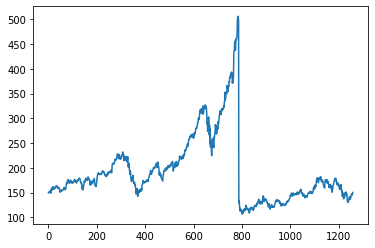

In [9]:
import matplotlib.pyplot as plt
plt.plot(dfnew)

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
dfnew = scaler.fit_transform(np.array(dfnew).reshape(-1,1))
dfnew

array([[0.10700063],
       [0.10830307],
       [0.11065748],
       ...,
       [0.09680651],
       [0.10427051],
       [0.10852849]])

In [11]:
training_size = int(len(dfnew)*0.65) 
test_size = len(dfnew) - training_size

In [12]:
train_data,test_data = dfnew[0:training_size,:], dfnew[training_size:len(dfnew),:1]
len(train_data)

818

In [13]:
len(test_data)


441

In [14]:
train_data


array([[1.07000626e-01],
       [1.08303068e-01],
       [1.10657483e-01],
       [1.08954289e-01],
       [1.08778961e-01],
       [1.13337508e-01],
       [1.14965560e-01],
       [1.16768942e-01],
       [1.09505322e-01],
       [1.06850344e-01],
       [1.04921728e-01],
       [1.08227927e-01],
       [1.25986224e-01],
       [1.22053851e-01],
       [1.24107702e-01],
       [1.30169067e-01],
       [1.33350031e-01],
       [1.35804629e-01],
       [1.21427677e-01],
       [1.26837821e-01],
       [1.32773951e-01],
       [1.37157170e-01],
       [1.35529117e-01],
       [1.27789606e-01],
       [1.26887915e-01],
       [1.26161553e-01],
       [1.32598622e-01],
       [1.33099562e-01],
       [1.31321227e-01],
       [1.32798998e-01],
       [1.36831559e-01],
       [1.40438322e-01],
       [1.41540388e-01],
       [1.43168441e-01],
       [1.43293676e-01],
       [1.38359424e-01],
       [1.37933626e-01],
       [1.36305573e-01],
       [1.29718222e-01],
       [1.36906700e-01],


In [15]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape), print(y_train.shape)


(717, 100)
(717,)


(None, None)

In [18]:
print(X_test.shape), print(ytest.shape)


(340, 100)
(340,)


(None, None)

In [19]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))   # 50 signifies the hidden layers
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
12/12 [==============================] - 17s 761ms/step - loss: 0.0432 - val_loss: 0.0024
Epoch 2/100
12/12 [==============================] - 6s 487ms/step - loss: 0.0164 - val_loss: 0.0105
Epoch 3/100
12/12 [==============================] - 6s 493ms/step - loss: 0.0121 - val_loss: 0.0016
Epoch 4/100
12/12 [==============================] - 6s 460ms/step - loss: 0.0087 - val_loss: 8.0709e-04
Epoch 5/100
12/12 [==============================] - 5s 438ms/step - loss: 0.0075 - val_loss: 2.7148e-04
Epoch 6/100
12/12 [==============================] - 4s 291ms/step - loss: 0.0079 - val_loss: 0.0021
Epoch 7/100
12/12 [==============================] - 3s 225ms/step - loss: 0.0061 - val_loss: 9.3206e-04
Epoch 8/100
12/12 [==============================] - 3s 224ms/step - loss: 0.0052 - val_loss: 3.5351e-04
Epoch 9/100
12/12 [==============================] - 3s 226ms/step - loss: 0.0050 - val_loss: 2.2320e-04
Epoch 10/100
12/12 [==============================] - 3s 223ms/step - 

In [24]:
import tensorflow as tf


In [25]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [26]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

231.87090416538987

In [28]:
math.sqrt(mean_squared_error(ytest,test_predict))


155.26459398960736

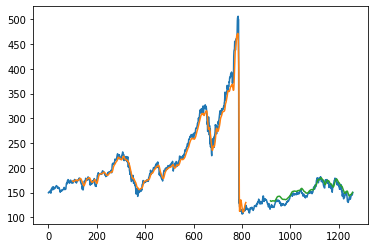

In [29]:
look_back=100
trainpredictplot = np.empty_like(dfnew)
trainpredictplot[:, :] = np.nan
trainpredictplot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testpredictplot = np.empty_like(dfnew)
testpredictplot[:, :] = np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(dfnew)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dfnew))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()


In [30]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 101)

In [31]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [32]:
temp_input


[0.15143393863494048,
 0.14396994364433308,
 0.13332498434564805,
 0.14001252348152782,
 0.14529743268628675,
 0.14597370068879145,
 0.14116468378209135,
 0.14958046336881647,
 0.1487539135879774,
 0.14108954289292414,
 0.13139636819035688,
 0.1267376330619912,
 0.1405385097056981,
 0.12944270507201,
 0.11994990607388845,
 0.10965560425798371,
 0.12085159674389478,
 0.13212273011897302,
 0.13470256731371316,
 0.14311834690043823,
 0.14662492172824038,
 0.1552410770194113,
 0.1587226048841578,
 0.16839073262366933,
 0.17001878522229175,
 0.17222291797119593,
 0.18063869755792106,
 0.1776581089542893,
 0.16974326862867878,
 0.16899185973700687,
 0.1793362554790231,
 0.17087038196618654,
 0.16278021289918598,
 0.1635566687539135,
 0.158422041327489,
 0.14755165936130238,
 0.1523356293049467,
 0.15919849718221663,
 0.14639949906073885,
 0.1458484658735128,
 0.15168440826549778,
 0.15125860989355033,
 0.14922980588603624,
 0.13763306199123349,
 0.140363180964308,
 0.1251346274264245,
 0.124

In [33]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):      # 30 = predicting output for next 30 days
  if(len(temp_input)>100):
    #print(temp_input)
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    #print(x_input)
    yhat=model.predict(x_input,verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    #print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())     #adding output to input list to maintain the size. so when the next figure is taken that shoud also be taken as a batch of 100 figures 
    print(len(temp_input))
    lst_output.extend(yhat.tolist())        #adding output in output list
    i=i+1

print(lst_output)

0 day input [0.14396994 0.13332498 0.14001252 0.14529743 0.1459737  0.14116468
 0.14958046 0.14875391 0.14108954 0.13139637 0.12673763 0.14053851
 0.12944271 0.11994991 0.1096556  0.1208516  0.13212273 0.13470257
 0.14311835 0.14662492 0.15524108 0.1587226  0.16839073 0.17001879
 0.17222292 0.1806387  0.17765811 0.16974327 0.16899186 0.17933626
 0.17087038 0.16278021 0.16355667 0.15842204 0.14755166 0.15233563
 0.1591985  0.1463995  0.14584847 0.15168441 0.15125861 0.14922981
 0.13763306 0.14036318 0.12513463 0.12455855 0.14226675 0.12726362
 0.12804008 0.13184721 0.14822793 0.12505949 0.12633688 0.11326237
 0.11939887 0.09933626 0.08946775 0.10086412 0.09693175 0.10619912
 0.08510958 0.07641828 0.07701941 0.09084534 0.08395742 0.08435817
 0.09252348 0.107201   0.10519724 0.10487163 0.11113338 0.096531
 0.09843456 0.10487163 0.10299311 0.08966813 0.07586725 0.0627176
 0.06492173 0.07160927 0.05815905 0.06191609 0.07271133 0.07140889
 0.0787226  0.08721353 0.08721353 0.07664371 0.081127

In [34]:
day_new=np.arange(1,101)    #data is of 100 days
day_pred=np.arange(101,131)   #prediction is to be done for 30 days

In [35]:
dfnewnew=dfnew.tolist()
dfnewnew.extend(lst_output)

In [36]:
len(dfnew)


1259

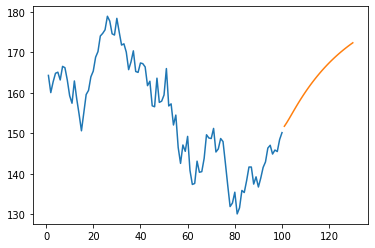

In [42]:
plt.plot(day_new,scaler.inverse_transform(dfnew[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

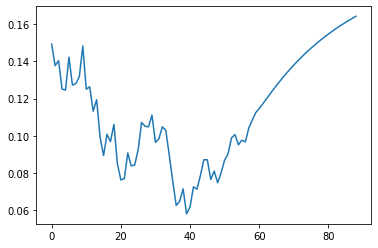

In [39]:
dfnewnew=dfnew.tolist()
dfnewnew.extend(lst_output)
plt.plot(dfnewnew[1200:])

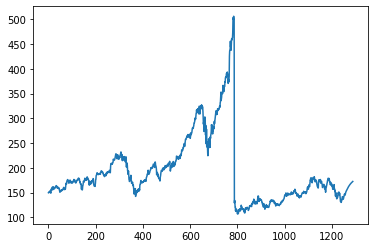

In [40]:
dfnewnew=scaler.inverse_transform(dfnewnew).tolist()
plt.plot(dfnewnew)